In [1]:
import numpy as np
from ulmo.models import DCAE, ConditionalFlow
from ulmo.ood import ProbabilisticAutoencoder

In [2]:
autoencoder = DCAE(input_channels=1, latent_dim=512)

In [3]:
flow = ConditionalFlow(
    dim=512, 
    context_dim=None, 
    transform_type='autoregressive', 
    n_layers=10, 
    hidden_units=256,
    n_blocks=2, 
    dropout=0.2, 
    use_batch_norm=False, 
    tails='linear', 
    tail_bound=10, 
    n_bins=5,
    min_bin_height=1e-3, 
    min_bin_width=1e-3, 
    min_derivative=1e-3, 
    unconditional_transform=False, 
    encoder=None)

In [4]:
filepath = '/cephfs/data/sst/MODIS_2010_100clear_48x48.h5'

In [5]:
pae = ProbabilisticAutoencoder(autoencoder=autoencoder, flow=flow, filepath=filepath)

Training on 2,538,496 samples. Validating on 133,376 samples.


Training stopped. Save model (y/n)? n


No handles with labels found to put in legend.


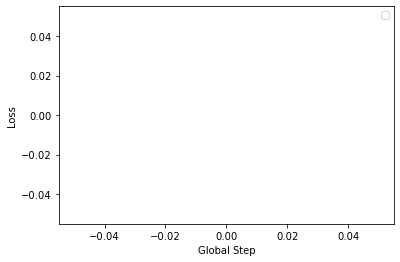

In [6]:
pae.train_autoencoder(n_epochs=1, batch_size=256, lr=2.5e-3, summary_interval=50, eval_interval=1000)

In [ ]:
pae.train_flow(n_epochs=1, batch_size=64, lr=2.5e-4, summary_interval=50, eval_interval=1000)

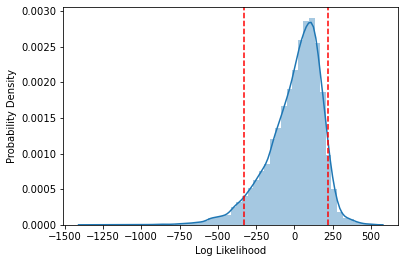

In [8]:
pae.plot_log_probs()

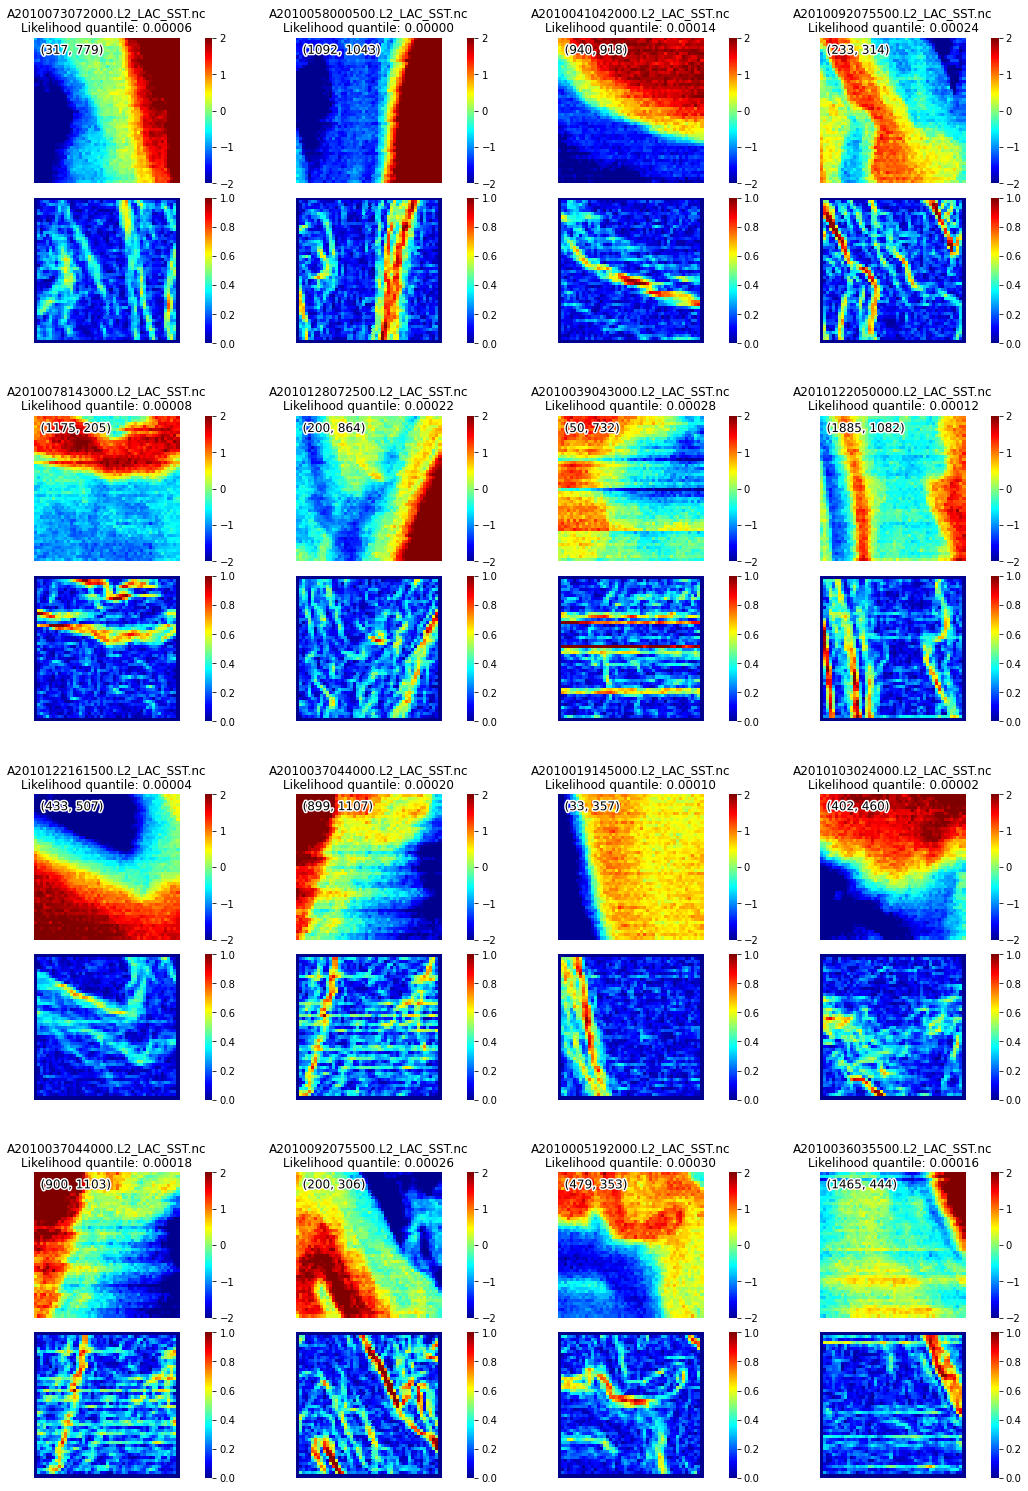

In [9]:
pae.plot_grid('least likely')

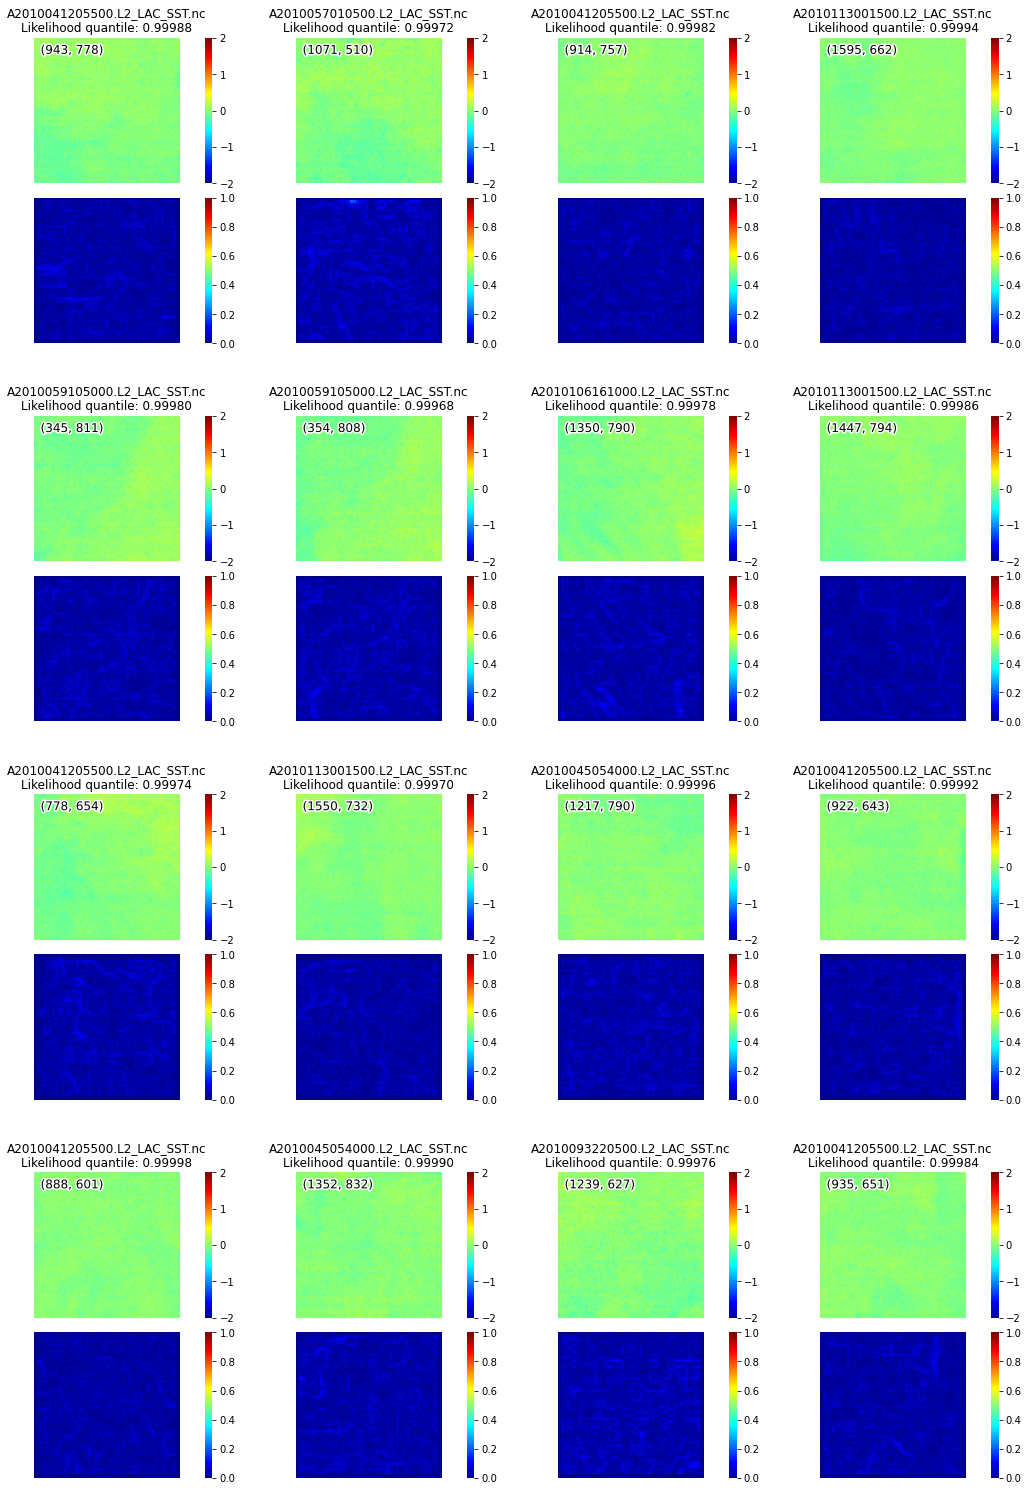

In [11]:
pae.plot_grid('most likely')

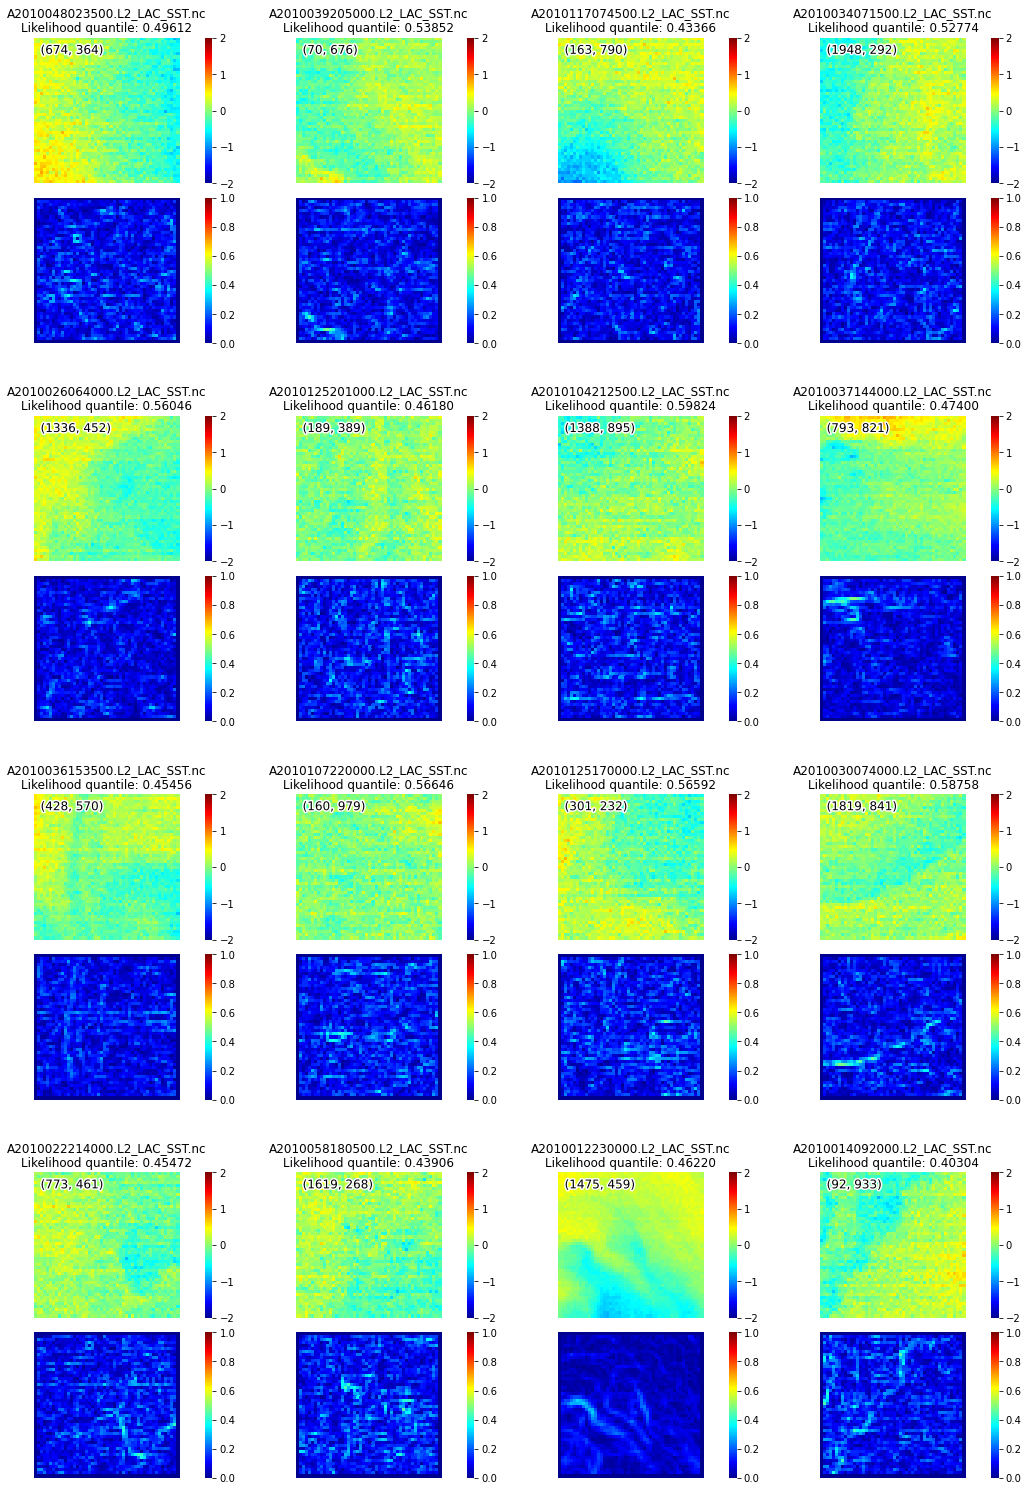

In [12]:
pae.plot_grid('midliers')